In [ ]:
# for mathematical operations
import numpy as np
# for dataframe operations
import pandas as pd

# for data visualizations
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# for machine learning
import sklearn
import imblearn

# setting up the size of the figures
from pylab import rcParams
plt.rcParams['figure.figsize'] = (8, 5)
# setting up the style of the plot
#plt.style.use('fivethirtyeight')
%matplotlib inline

In [ ]:
def explore_effect_on_promotion(feature, lab_rot):
  import matplotlib.pyplot as plt
  import numpy as np
  plt.rcParams['figure.figsize'] = (8,5)
  #Plot Distribution
  df_fna.groupby([feature,'is_promoted']).size().unstack().plot(kind='bar', stacked=True, title=f'Distribution of Employees by {feature}', ylabel='# of Employees')
  #Plot Proportional Effect on Promotion
  # create dataframe with proportions
  x = pd.crosstab(df_fna[feature], df_fna['is_promoted'])
  pro = x.div(x.sum(axis=1), axis=0)

  # plot
  ax = pro.plot(kind='bar', stacked=False)

  # move legend
  ax.legend(title='is_promoted', bbox_to_anchor=(1, 1.01), loc='upper left')

  # column names from per used to get the column values from df
  cols = pro.columns

  # iterate through each group of containers and the corresponding column name
  for c, col in zip(ax.containers, cols):

      # get the values for the column from df
      vals = x[col]

      # create a custom label for bar_label
      labels = [f'{h*100:.1f}%' if (h := v.get_height()) > 0 else '' for v, val in zip(c, vals)]

      # annotate each section with the custom labels
      ax.bar_label(c, labels=labels, label_type='edge',rotation=lab_rot, fontweight='bold')
  plt.title(f'Effect of {feature} on Promotion')
  plt.xticks(rotation=lab_rot)
  plt.ylabel('Proportion')
  plt.show()

##Import Data with Null Values Treated

In [ ]:
# Mount Google Drive (if not already mounted)
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import Dataset
df_fna = pd.read_csv('/content/drive/MyDrive/613 Capstone/Data_MissingValuesHandled.csv')
df_fna

,Unnamed: 0,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0
54804,54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,0,56,0
54805,54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,1,0,79,0
54806,54806,13614,Sales & Marketing,region_9,Bachelor's,m,sourcing,1,29,1.0,2,0,0,45,0


##Check Outliers for no_of_trainings

In [ ]:
df_fna['no_of_trainings'].value_counts()

1     44378
2      7987
3      1776
4       468
5       128
6        44
7        12
8         5
10        5
9         5
Name: no_of_trainings, dtype: int64

In [ ]:
fig=px.box(df_fna,y='no_of_trainings',points='outliers', title='Outliers in no_of_trainings')
#plt.rcParams['figure.figsize'] = (8, 5)
fig.update_layout(autosize=False, width=600, height=600, hovermode='x',)

look at iqr

In [ ]:
IQR= df_fna['no_of_trainings'].quantile(0.75) - df_fna['no_of_trainings'].quantile(0.25)
IQR

0.0

In [ ]:
## Calculating the boundaries
lower_bridge= df_fna['no_of_trainings'].quantile(0.25)-(IQR*1.5)
upper_bridge= df_fna['no_of_trainings'].quantile(0.75)+(IQR*1.5)
print(lower_bridge), print(upper_bridge)

1.0
1.0


(None, None)

In [ ]:
df_fna['no_of_trainings'].describe()

count    54808.000000
mean         1.253011
std          0.609264
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         10.000000
Name: no_of_trainings, dtype: float64

In [ ]:
## Calculating the extreme boundaries
lower_bridge= df_fna['no_of_trainings'].quantile(0.25)-(IQR*3)
upper_bridge= df_fna['no_of_trainings'].quantile(0.75)+(IQR*3)
print(lower_bridge), print(upper_bridge)

1.0
1.0


(None, None)

We obviously don't want to remove all information for these outliers, nor do we want to cap everything to 1. Instead we will cap everything above 5 into a category for >=5 trainings.

In [ ]:
df_fna.loc[df_fna['no_of_trainings'] > 5, 'no_of_trainings']=5

##Check Outliers for Age

In [ ]:
fig=px.box(df_fna,y='age',points='outliers', title='Outliers in age')

fig.update_layout(autosize=False, width=600, height=600, hovermode='x')

In [ ]:
IQR= df_fna['age'].quantile(0.75) - df_fna['age'].quantile(0.25)
IQR

10.0

In [ ]:
## Calculating the boundaries
lower_bridge= df_fna['age'].quantile(0.25)-(IQR*1.5)
upper_bridge= df_fna['age'].quantile(0.75)+(IQR*1.5)
print(lower_bridge), print(upper_bridge)

14.0
54.0


(None, None)

In [ ]:
df_fna['age'].describe()

count    54808.000000
mean        34.803915
std          7.660169
min         20.000000
25%         29.000000
50%         33.000000
75%         39.000000
max         60.000000
Name: age, dtype: float64

In [ ]:
## Calculating the extreme boundaries
lower_bridge= df_fna['age'].quantile(0.25)-(IQR*3)
upper_bridge= df_fna['age'].quantile(0.75)+(IQR*3)
print(lower_bridge), print(upper_bridge)

-1.0
69.0


(None, None)

In [ ]:
df_fna.loc[df_fna['age'] > 54, 'age']=54

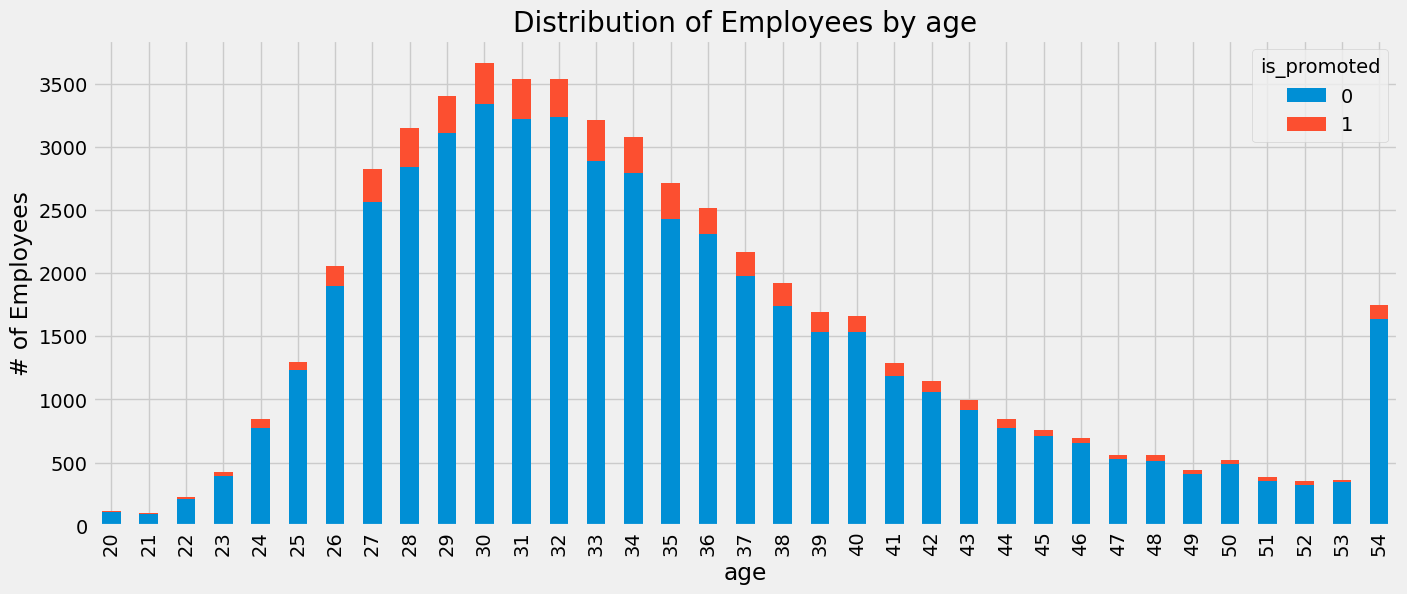

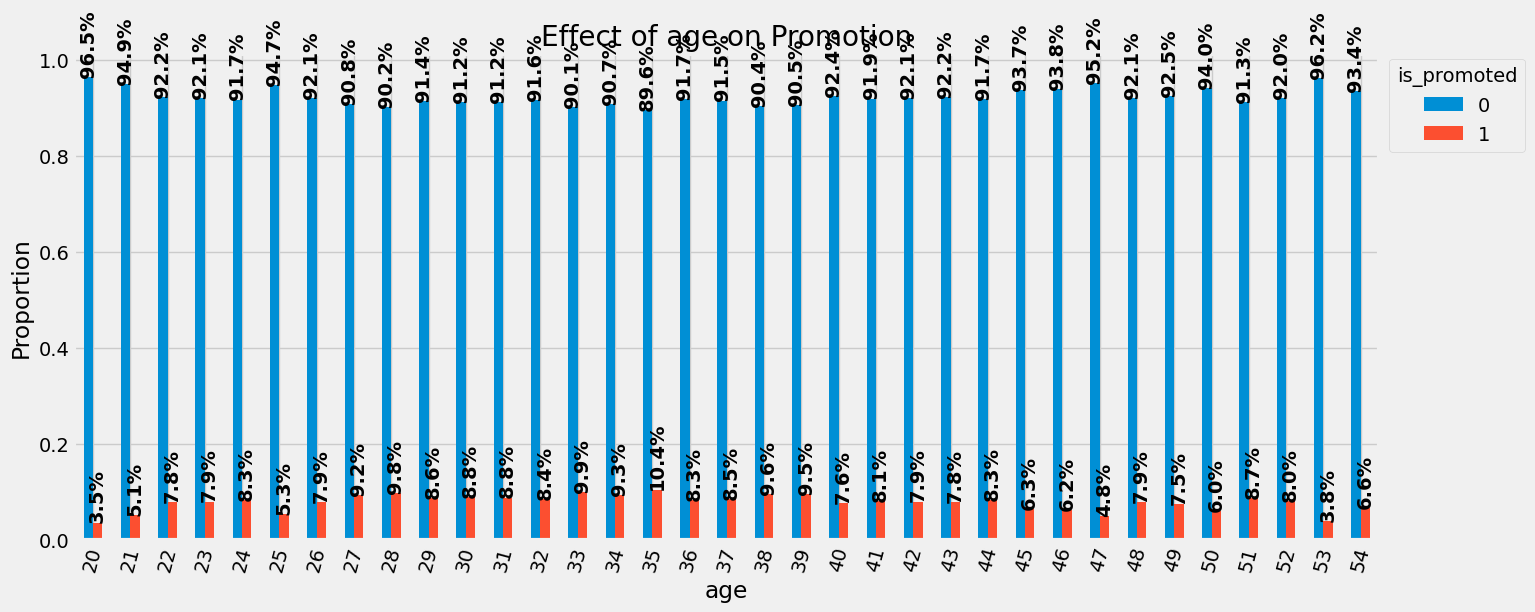

In [ ]:
explore_effect_on_promotion('age',90)

In [ ]:
fig=px.box(df_fna,y='age',points='outliers', title='Outliers in age')

fig.update_layout(hovermode='x')

##Check outliers in length_of_service

In [ ]:
df_fna['length_of_service'].value_counts().sort_index()

1     4547
2     6684
3     7033
4     6836
5     5832
6     4734
7     5551
8     2883
9     2629
10    2193
11     916
12     794
13     687
14     549
15     593
16     548
17     432
18     392
19     329
20     128
21      78
22      61
23      65
24      70
25      51
26      41
27      36
28      30
29      30
30      12
31      20
32      10
33       9
34       4
37       1
Name: length_of_service, dtype: int64

In [ ]:
fig=px.box(df_fna,y='length_of_service',points='outliers', title='Outliers in length_of_service')

fig.update_layout(autosize=False, width=600, height=600, hovermode='x')

In [ ]:
IQR= df_fna['length_of_service'].quantile(0.75) - df_fna['length_of_service'].quantile(0.25)
IQR

4.0

In [ ]:
## Calculating the boundaries
lower_bridge= df_fna['length_of_service'].quantile(0.25)-(IQR*1.5)
upper_bridge= df_fna['length_of_service'].quantile(0.75)+(IQR*1.5)
print(lower_bridge), print(upper_bridge)

-3.0
13.0


(None, None)

In [ ]:
df_fna['length_of_service'].describe()

count    54808.000000
mean         5.865512
std          4.265094
min          1.000000
25%          3.000000
50%          5.000000
75%          7.000000
max         37.000000
Name: length_of_service, dtype: float64

In [ ]:
## Calculating the extreme boundaries
lower_bridge= df_fna['length_of_service'].quantile(0.25)-(IQR*3)
upper_bridge= df_fna['length_of_service'].quantile(0.75)+(IQR*3)
print(lower_bridge), print(upper_bridge)

-9.0
19.0


(None, None)

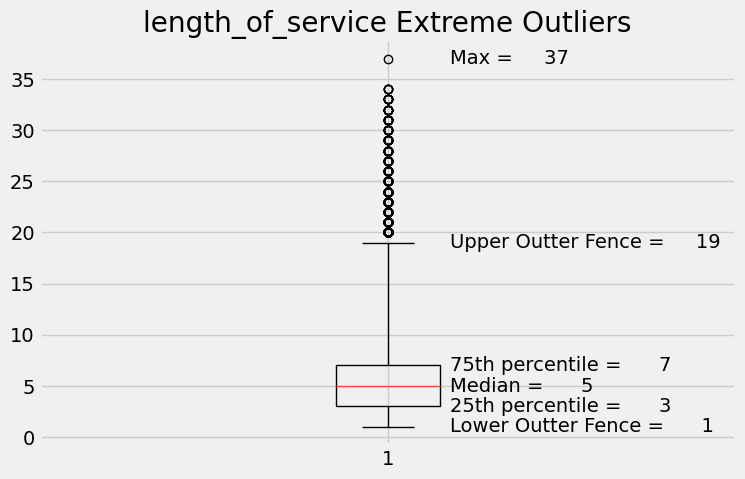

In [ ]:
def make_labels(ax, boxplot):

    # Grab the relevant Line2D instances from the boxplot dictionary
    iqr = boxplot['boxes'][0]
    caps = boxplot['caps']
    med = boxplot['medians'][0]
    fly = boxplot['fliers'][0]


    # The x position of the median line
    xpos = med.get_xdata()

    # Lets make the text have a horizontal offset which is some
    # fraction of the width of the box
    xoff = 0.10 * (xpos[1] - xpos[0])

    # The x position of the labels
    xlabel = xpos[1] + xoff

    # The median is the y-position of the median line
    median = med.get_ydata()[1]

    # The 25th and 75th percentiles are found from the
    # top and bottom (max and min) of the box
    pc25 = iqr.get_ydata().min()
    pc75 = iqr.get_ydata().max()

    # The caps give the vertical position of the ends of the whiskers
    capbottom = caps[0].get_ydata()[0]
    captop = caps[1].get_ydata()[0]

    #The maximum is the y-position of the maximum value
    maximum = max(fly.get_ydata())

    # Make some labels on the figure using the values derived above
    ax.text(xlabel, median,
            'Median = {:6.3g}'.format(median), va='center')
    ax.text(xlabel, pc25,
            '25th percentile = {:6.3g}'.format(pc25), va='center')
    ax.text(xlabel, pc75,
            '75th percentile = {:6.3g}'.format(pc75), va='center')
    ax.text(xlabel, capbottom,
            'Lower Outter Fence = {:6.3g}'.format(capbottom), va='center')
    ax.text(xlabel, captop,
            'Upper Outter Fence = {:6.3g}'.format(captop), va='center')
    ax.text(xlabel, maximum,
            'Max = {:6.3g}'.format(maximum), va='center')


# Make the figure
fig3, ax3 = plt.subplots()
ax3.set_title('length_of_service Extreme Outliers')

# Create the boxplot and store the resulting python dictionary
my_boxes = ax3.boxplot(df_fna['length_of_service'], whis=3)

# Call the function to make labels
make_labels(ax3, my_boxes)

plt.show()
#plt.boxplot(df_fna['length_of_service'], whis=3)

We will cap length of service at 21. Anything above 21 will be set to 21, making this category representative of those with >20 years of service

In [ ]:
df_fna.loc[df_fna['length_of_service'] > 19, 'length_of_service']=19

In [ ]:
fig=px.box(df_fna,y='length_of_service',points='outliers', title='Outliers in length_of_service')

fig.update_layout(hovermode='x')

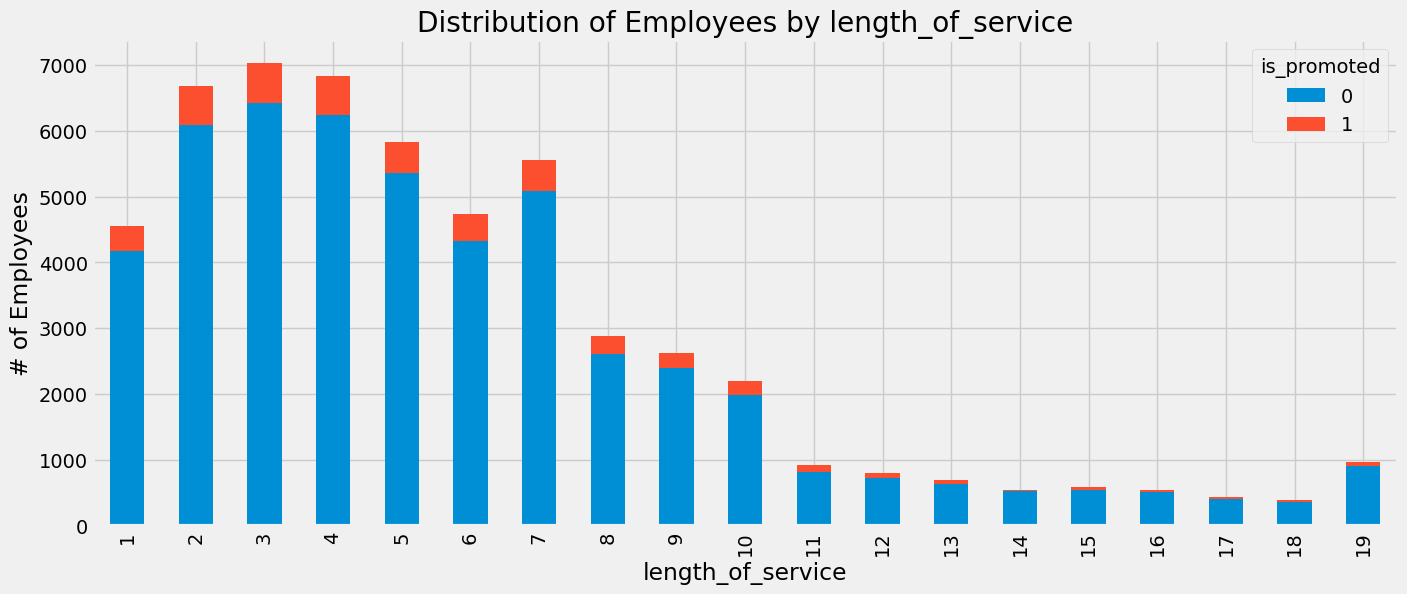

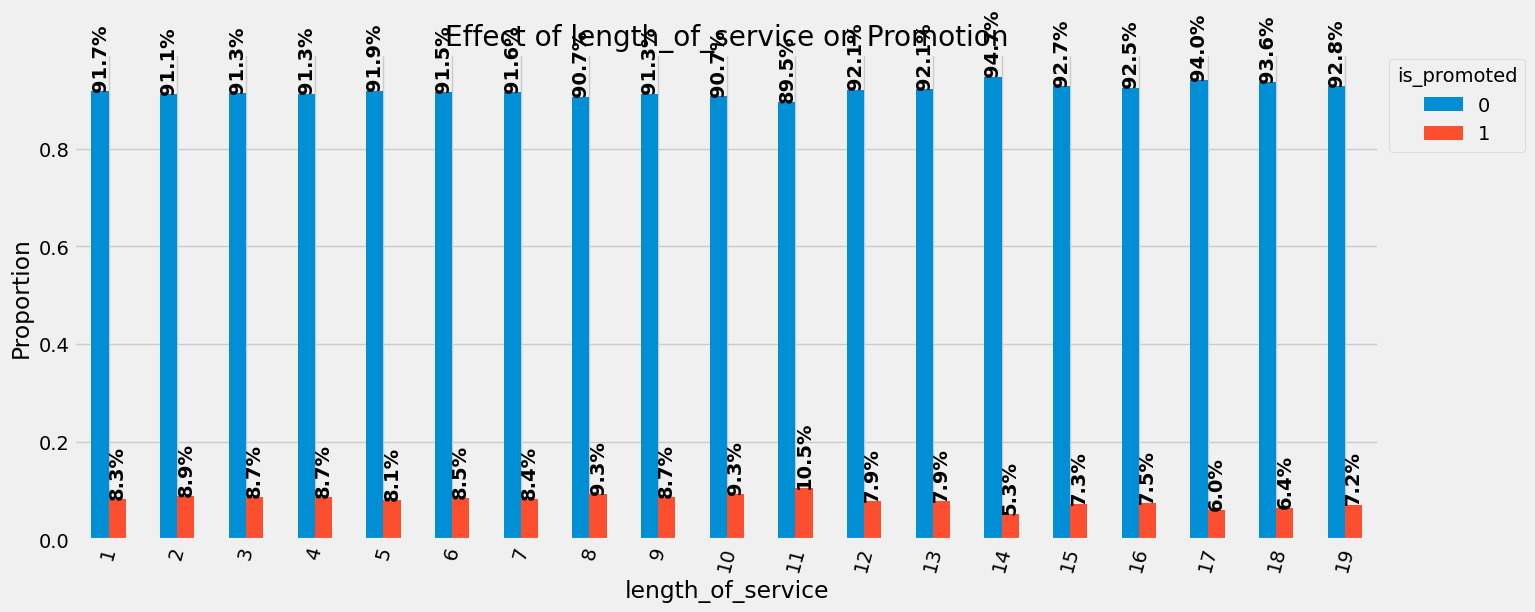

In [ ]:
explore_effect_on_promotion('length_of_service',90)

Now we will group this into 5 year intervals.

In [ ]:
df_fna['len_service_groups'] = pd.cut(df_fna['length_of_service'], [0,5,10,15,20,40], labels=False)

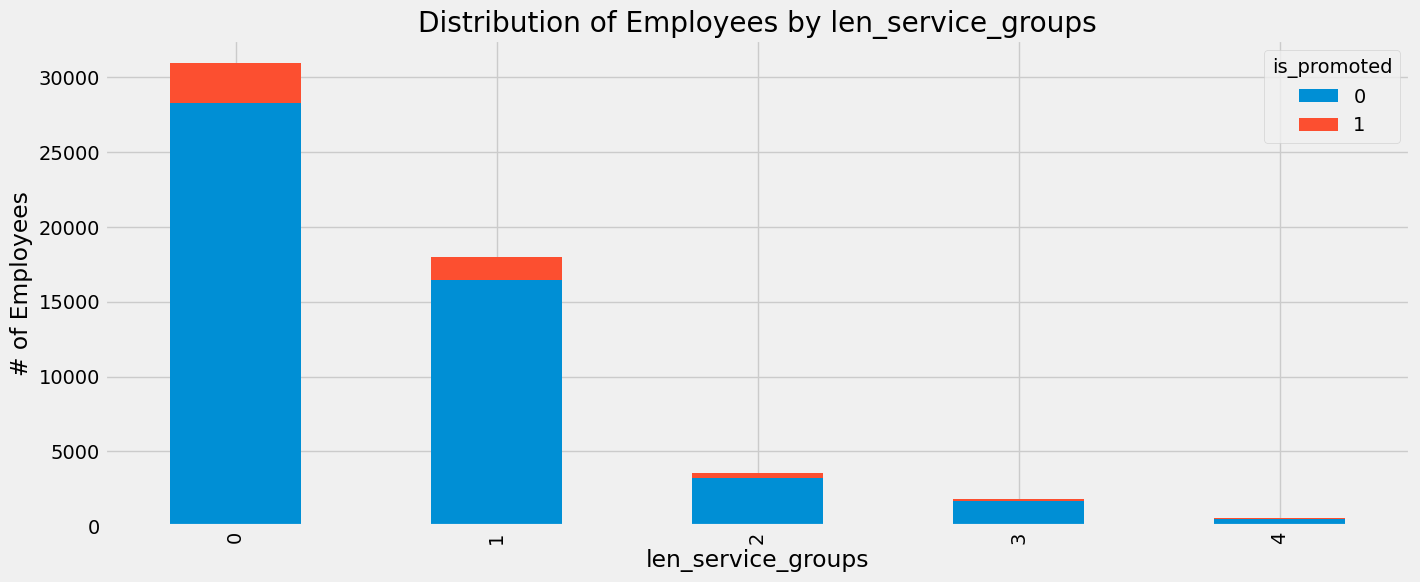

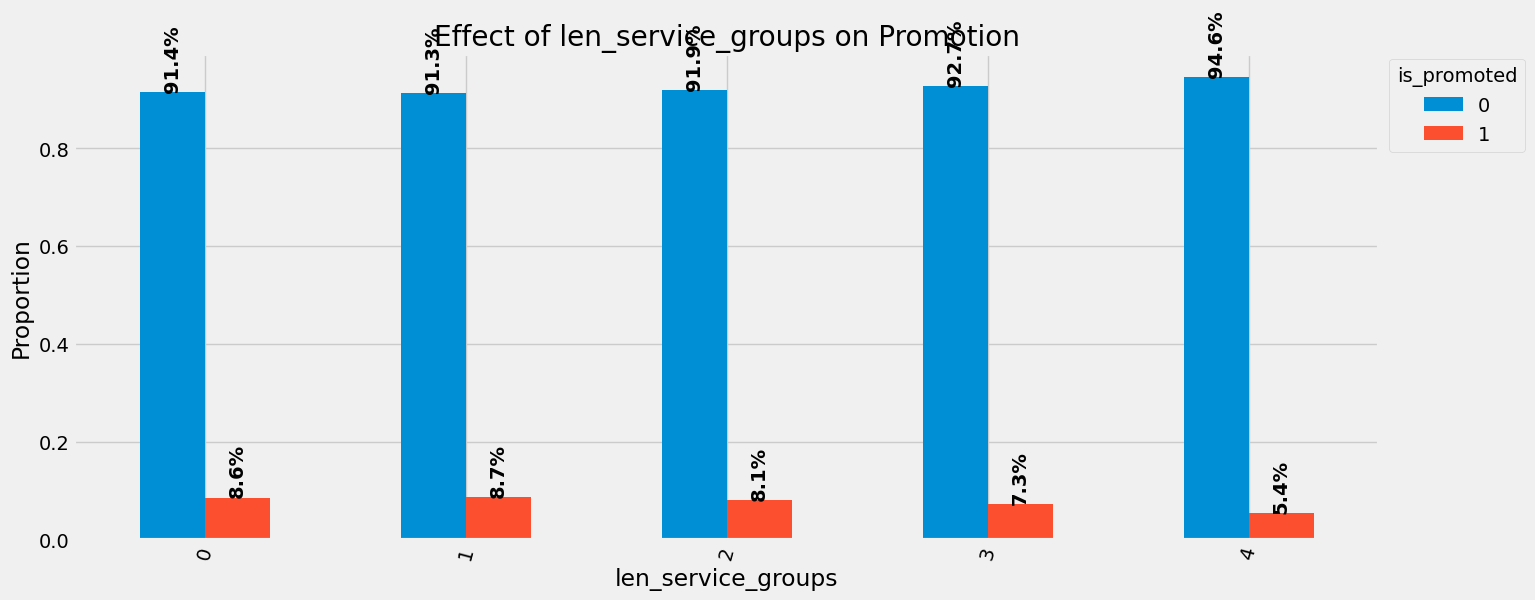

In [ ]:
explore_effect_on_promotion('len_service_groups',90)

In [ ]:
fig=px.box(df_fna,y='len_service_groups',points='outliers', title='Outliers in len_service_groups')

fig.update_layout(hovermode='x')

##Check Outliers in avg_training_score

In [ ]:
df_fna['avg_training_score'].value_counts().sort_index()

39      2
40      5
41     26
42     62
43    176
     ... 
95     45
96     48
97     49
98     37
99     35
Name: avg_training_score, Length: 61, dtype: int64

In [ ]:
fig=px.box(df_fna,y='avg_training_score',points='outliers', title='Outliers in avg_training_score')

fig.update_layout(autosize=False, width=600, height=600, hovermode='x')

No outliers. We will keep all values as is, but will categorize into groups. 0-50, 50-60, 60-70, 70-80, 80-90, and 90-100.

In [ ]:
df_fna['avg_training_score_groups'] = pd.cut(df_fna['avg_training_score'], [0,49,59,69,79,89,100], labels=False)

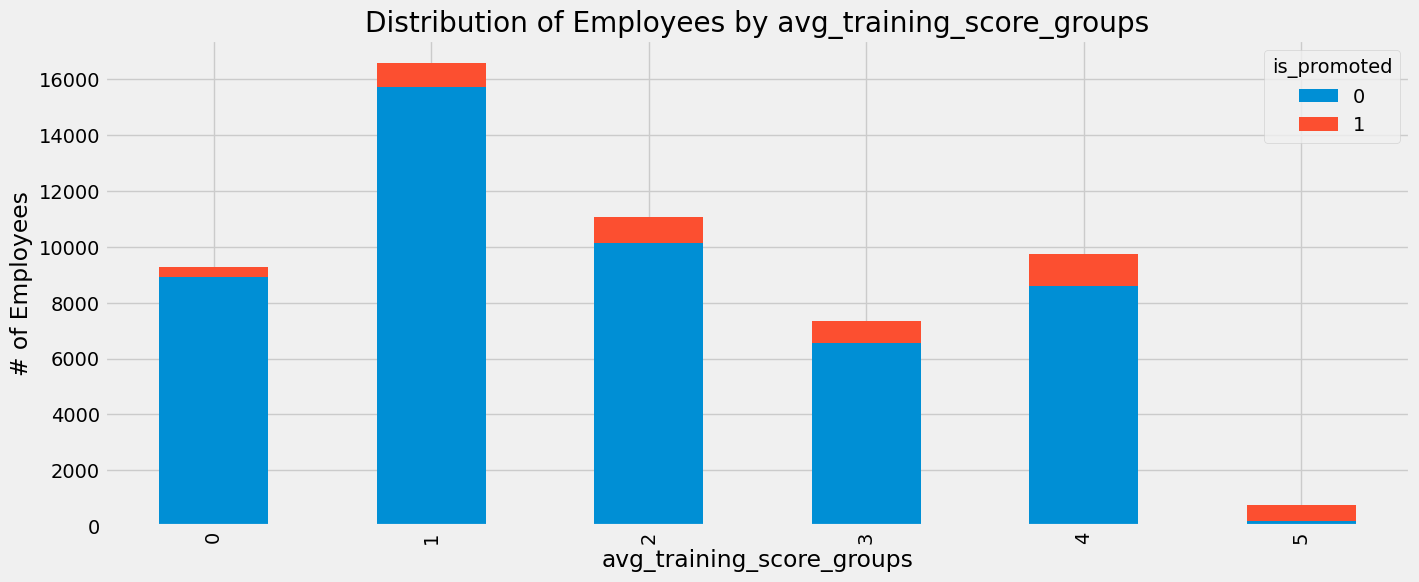

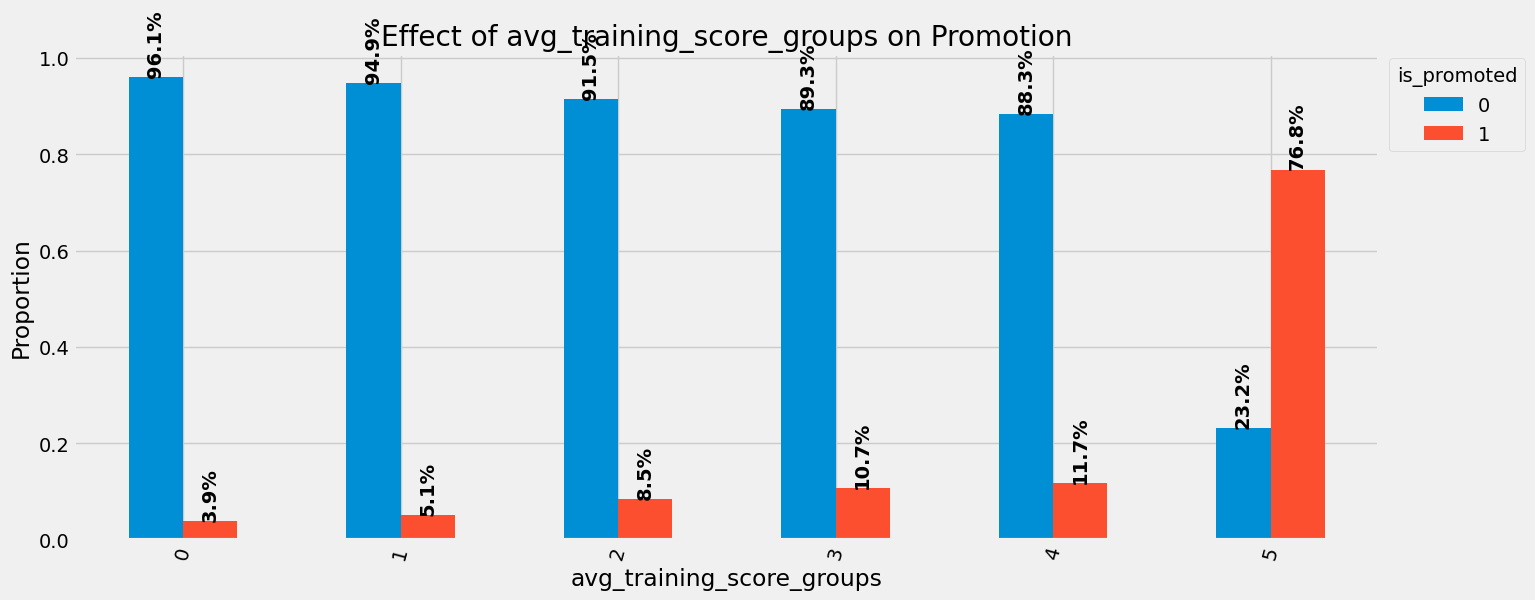

In [ ]:
explore_effect_on_promotion('avg_training_score_groups', 90)

##Categorical - Numerical

Gender

In [ ]:
dummies=pd.get_dummies(inputs.Sex)
inputs=pd.concat([inputs,dummies],axis='columns')
inputs.drop(['gender','m'],axis='columns',inplace=True)